# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder,StandardScaler
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Loading Datasets

In [3]:

titanic = pd.read_csv("titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic = titanic.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [6]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


# Label Encoding


In [7]:
sex_label = LabelEncoder()
embarked_label = LabelEncoder()

titanic['Sex'] = sex_label.fit_transform(titanic['Sex'])
sex_map = dict(enumerate(sex_label.classes_))

titanic['Embarked'] = embarked_label.fit_transform(titanic['Embarked'])
embarked_map = dict(enumerate(embarked_label.classes_))

titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [8]:
print(f'Sex Mapping -- > {sex_map}')
print(f'Embarked_mapping -- > {embarked_map}')

Sex Mapping -- > {0: 'female', 1: 'male'}
Embarked_mapping -- > {0: 'C', 1: 'Q', 2: 'S'}


In [9]:
X = titanic.drop('Survived',axis=1)
Y = titanic['Survived']

In [10]:
scaled = StandardScaler()

X_scaled = scaled.fit_transform(X)
print(X_scaled)

[[ 0.82737724  0.73769513 -0.56573646 ... -0.47367361 -0.50244517
   0.58595414]
 [-1.56610693 -1.35557354  0.66386103 ... -0.47367361  0.78684529
  -1.9423032 ]
 [ 0.82737724 -1.35557354 -0.25833709 ... -0.47367361 -0.48885426
   0.58595414]
 ...
 [ 0.82737724 -1.35557354 -0.1046374  ...  2.00893337 -0.17626324
   0.58595414]
 [-1.56610693  0.73769513 -0.25833709 ... -0.47367361 -0.04438104
  -1.9423032 ]
 [ 0.82737724  0.73769513  0.20276197 ... -0.47367361 -0.49237783
  -0.67817453]]


In [11]:
X_train,X_test,Y_train,Y_test = train_test_split(X_scaled,Y,test_size=0.2,random_state=0,stratify=Y)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(712, 7) (179, 7) (712,) (179,)


# Gradient Boosting


In [12]:

gradient = GradientBoostingClassifier(
    n_estimators=100,          
    learning_rate=0.1,         
    max_depth=3,               
    random_state=0             
)


gradient.fit(X_train, Y_train)


X_train_pred_gb = gradient.predict(X_train)
X_test_pred_gb = gradient.predict(X_test)

train_accuracy_gb = accuracy_score(Y_train, X_train_pred_gb)
test_accuracy_gb = accuracy_score(Y_test, X_test_pred_gb)

print(f"Gradient Boosting Train Accuracy: {train_accuracy_gb:}")
print(f"Gradient Boosting Test Accuracy: {test_accuracy_gb:}")


Gradient Boosting Train Accuracy: 0.901685393258427
Gradient Boosting Test Accuracy: 0.8491620111731844


In [13]:
print(classification_report(Y_train,X_train_pred_gb))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       439
           1       0.91      0.82      0.87       273

    accuracy                           0.90       712
   macro avg       0.90      0.89      0.89       712
weighted avg       0.90      0.90      0.90       712



In [14]:
print(classification_report(Y_test,X_test_pred_gb))

              precision    recall  f1-score   support

           0       0.84      0.94      0.88       110
           1       0.88      0.71      0.78        69

    accuracy                           0.85       179
   macro avg       0.86      0.82      0.83       179
weighted avg       0.85      0.85      0.85       179



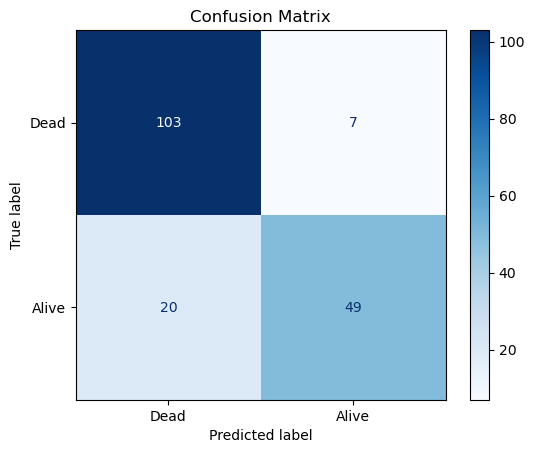

In [15]:
conf_mat = confusion_matrix(Y_test, X_test_pred_gb)
Matrix = ConfusionMatrixDisplay(confusion_matrix=conf_mat,display_labels=['Dead','Alive'])
Matrix.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Hyperparameter Tuning for Gradient Boosting

In [16]:

param_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0],          
    'min_samples_split': [2, 5,10]
}


In [17]:
grid_search_gb = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=0),
    param_grid=param_gb,
    cv=5,                       
    scoring='accuracy',
    n_jobs=-1           
)

grid_search_gb.fit(X_train, Y_train)


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=0),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy')

In [18]:
print(f"Best Parameters for Gradient Boosting: {grid_search_gb.best_params_}")
print(f"Best Cross-Validation Accuracy for Gradient Boosting: {grid_search_gb.best_score_:}")


Best Parameters for Gradient Boosting: {'learning_rate': 0.05, 'max_depth': 4, 'min_samples_split': 10, 'n_estimators': 200, 'subsample': 1.0}
Best Cross-Validation Accuracy for Gradient Boosting: 0.8370432384516893


In [19]:
best_gb = grid_search_gb.best_estimator_
X_test_pred_best_gb = best_gb.predict(X_test)
test_accuracy_best_gb = accuracy_score(Y_test, X_test_pred_best_gb)
print(f"Test Accuracy with Best Gradient Boosting Parameters: {test_accuracy_best_gb:}")


Test Accuracy with Best Gradient Boosting Parameters: 0.8547486033519553


In [20]:
print("Best Gradient Boosting Classification Report (Test Set):")
print(classification_report(Y_test, X_test_pred_best_gb, target_names=['Dead','Alive']))

Best Gradient Boosting Classification Report (Test Set):
              precision    recall  f1-score   support

        Dead       0.85      0.93      0.89       110
       Alive       0.86      0.74      0.80        69

    accuracy                           0.85       179
   macro avg       0.86      0.83      0.84       179
weighted avg       0.86      0.85      0.85       179



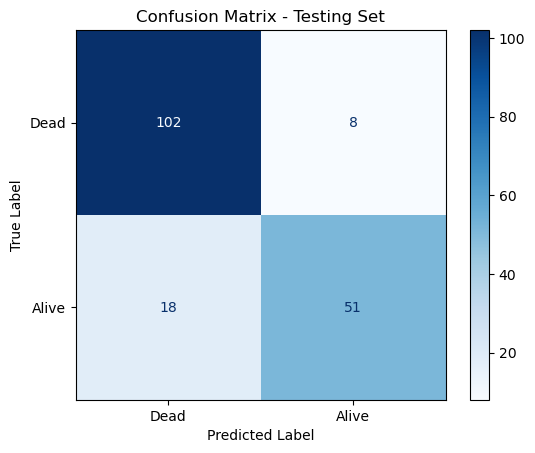

In [21]:

conf_mat_gb = confusion_matrix(Y_test, X_test_pred_best_gb)
Matrix = ConfusionMatrixDisplay(confusion_matrix=conf_mat_gb, display_labels=['Dead','Alive'])
Matrix.plot(cmap=plt.cm.Blues, values_format='d')  
plt.title("Confusion Matrix - Testing Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# XGBoost

In [22]:
xgb = XGBClassifier(
    n_estimators=100,          
    learning_rate=0.1,         
    max_depth=3,               
    objective='binary:logistic',  
    use_label_encoder=False,   
    eval_metric='logloss',        
    random_state=0             
)


xgb.fit(X_train, Y_train)

X_train_pred_xgb = xgb.predict(X_train)
X_test_pred_xgb = xgb.predict(X_test)

train_accuracy_xgb = accuracy_score(Y_train, X_train_pred_xgb)
test_accuracy_xgb = accuracy_score(Y_test, X_test_pred_xgb)

print(f"XGBoost Train Accuracy: {train_accuracy_xgb:}")
print(f"XGBoost Test Accuracy: {test_accuracy_xgb:}")




XGBoost Train Accuracy: 0.8932584269662921
XGBoost Test Accuracy: 0.8100558659217877


c:\Users\Asus\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:35:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [23]:

print("XGBoost Classification Report (Test Set):")
print(classification_report(Y_test, X_test_pred_xgb, target_names=['Dead','Alive']))


XGBoost Classification Report (Test Set):
              precision    recall  f1-score   support

        Dead       0.81      0.91      0.85       110
       Alive       0.82      0.65      0.73        69

    accuracy                           0.81       179
   macro avg       0.81      0.78      0.79       179
weighted avg       0.81      0.81      0.81       179



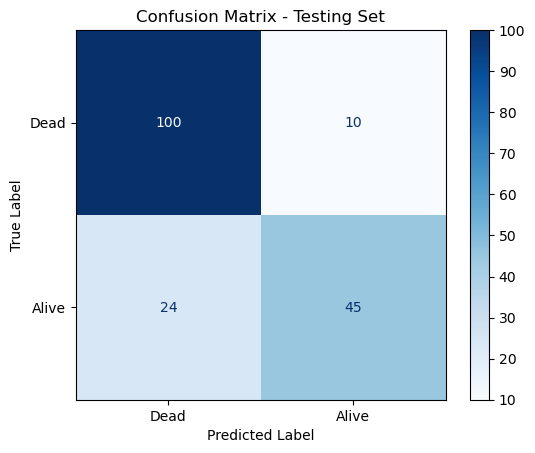

In [25]:

conf_mat_xgb = confusion_matrix(Y_test, X_test_pred_xgb)
Matrix = ConfusionMatrixDisplay(confusion_matrix=conf_mat_xgb, display_labels=['Dead','Alive'])
Matrix.plot(cmap=plt.cm.Blues, values_format='d')  
plt.title("Confusion Matrix - Testing Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [26]:

param_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],   
    'gamma': [0, 0.1, 0.2],           
    'reg_alpha': [0, 0.1, 0.5],       
    'reg_lambda': [1, 1.5, 2]         
}


In [28]:

xgb_clf = XGBClassifier(
    objective='binary:logistic',    
    use_label_encoder=False,
    eval_metric='logloss',         
    random_state=0
)

grid_search_xgb = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_xgb,
    scoring='accuracy',             
    cv=5,
    verbose=1,                     
    n_jobs=-1                       
)

grid_search_xgb.fit(X_train, Y_train)


Fitting 5 folds for each of 2916 candidates, totalling 14580 fits


c:\Users\Asus\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:44:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0], 'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300],
                         'reg_alpha': [0, 0.1, 0.5], 'reg_lambda': [1, 1.5, 2],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=1)

In [29]:
print(f"Best Parameters for XGBoost: {grid_search_xgb.best_params_}")
print(f"Best Cross-Validation Accuracy for XGBoost: {grid_search_xgb.best_score_:.4f}")

Best Parameters for XGBoost: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200, 'reg_alpha': 0.1, 'reg_lambda': 1, 'subsample': 0.8}
Best Cross-Validation Accuracy for XGBoost: 0.8384


In [30]:
best_xgb = grid_search_xgb.best_estimator_
X_test_pred_best_xgb = best_xgb.predict(X_test)
test_accuracy_best_xgb = accuracy_score(Y_test, X_test_pred_best_xgb)
print(f"Test Accuracy with Best XGBoost Parameters: {test_accuracy_best_xgb:.4f}")


Test Accuracy with Best XGBoost Parameters: 0.8380


In [31]:
print("Best XGBoost Classification Report (Test Set):")
print(classification_report(Y_test, X_test_pred_best_xgb, target_names=['Dead','Alive']))

Best XGBoost Classification Report (Test Set):
              precision    recall  f1-score   support

        Dead       0.83      0.93      0.88       110
       Alive       0.86      0.70      0.77        69

    accuracy                           0.84       179
   macro avg       0.84      0.81      0.82       179
weighted avg       0.84      0.84      0.83       179



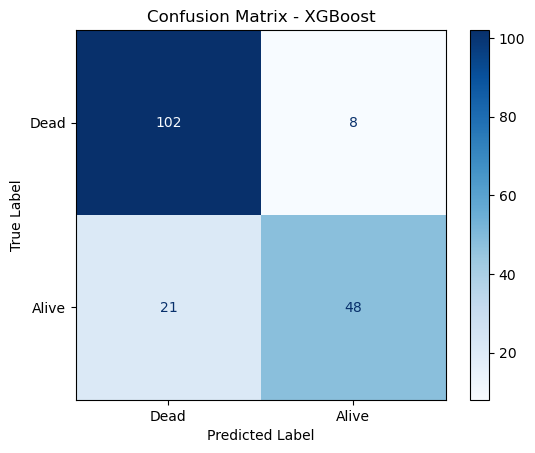

In [32]:

conf_mat_xgb = confusion_matrix(Y_test, X_test_pred_best_xgb)
Matrix_xgb = ConfusionMatrixDisplay(confusion_matrix=conf_mat_xgb, display_labels=['Dead','Alive'])
Matrix_xgb.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
